In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [2]:
file = Path('Resources/crypto_data.csv')

In [3]:
df = pd.read_csv(file, index_col=0)
df

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...
XBC,BitcoinPlus,Scrypt,True,PoS,1.283270e+05,1000000
DVTC,DivotyCoin,Scrypt,False,PoW/PoS,2.149121e+07,100000000
GIOT,Giotto Coin,Scrypt,False,PoW/PoS,NaN,233100000
OPSC,OpenSourceCoin,SHA-256,False,PoW/PoS,NaN,21000000


In [4]:
# List the  algorithms being used
algo_rithm = set(df.Algorithm.values)
print(algo_rithm)

{'SHA3', 'Leased POS', 'X11', 'Jump Consistent Hash', 'Equihash', 'X15', 'QUAIT', 'Momentum', 'VBFT', 'Counterparty', 'PHI1612', 'QuBit', 'Lyra2Z', 'Blake2b', 'PoS', 'Multiple', 'M7 POW', 'ScryptOG', 'Tribus', 'Curve25519', 'X11GOST', 'QuarkTX', 'POS 3.0', 'Green Protocol', 'C11', 'SHA3-256', 'POS 2.0', 'CryptoNight Heavy X', 'Slatechain', 'Blake2S', 'NIST5', 'Lyra2RE', 'DPoS', 'XEVAN', 'Proof-of-Authority', 'BLAKE256', 'CryptoNight-Lite', 'Shabal256', 'Ouroboros', 'Equihash1927', 'Lyra2REv2', 'Proof-of-BibleHash', 'Dagger', 'Keccak', 'TRC10', 'PHI2', 'X16S', 'Cryptonight-GPU', 'Avesta hash', 'CryptoNight', 'Progressive-n', 'Groestl', 'CryptoNight-V7', 'SHA-256', 'Time Travel', 'SHA-256D', 'Blake', 'SkunkHash', 'Scrypt-n', 'T-Inside', 'Quark', 'Argon2', '1GB AES Pattern Search', 'Argon2d', 'Dagger-Hashimoto', 'Wild Keccak', 'NeoScrypt', 'X13', 'Cloverhash', 'HybridScryptHash256', 'CryptoNight Heavy', 'vDPOS', 'IMesh', 'CryptoNight-lite', 'Equihash+Scrypt', 'Scrypt', 'Stanford Folding',

In [5]:
#  filter dataframe and drop cryptocurrencies where isTrading = False
trading_df = df.loc[(df["IsTrading"] == True)]
trading_df

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...
SERO,Super Zero,Ethash,True,PoW,NaN,1000000000
UOS,UOS,SHA-256,True,DPoI,NaN,1000000000
BDX,Beldex,CryptoNight,True,PoW,9.802226e+08,1400222610
ZEN,Horizen,Equihash,True,PoW,7.296538e+06,21000000


In [6]:
#Drop columns Istrading and Coinname
trading_df1 = trading_df.drop(columns=["IsTrading", "CoinName"])
trading_df1

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,Scrypt,PoW/PoS,4.199995e+01,42
365,X11,PoW/PoS,NaN,2300000000
404,Scrypt,PoW/PoS,1.055185e+09,532000000
611,SHA-256,PoW,NaN,611000
808,SHA-256,PoW/PoS,0.000000e+00,0
...,...,...,...,...
SERO,Ethash,PoW,NaN,1000000000
UOS,SHA-256,DPoI,NaN,1000000000
BDX,CryptoNight,PoW,9.802226e+08,1400222610
ZEN,Equihash,PoW,7.296538e+06,21000000


In [7]:
#Remove rows that have missing values
full_trading_df = trading_df1.dropna()
full_trading_df

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,Scrypt,PoW/PoS,4.199995e+01,42
404,Scrypt,PoW/PoS,1.055185e+09,532000000
808,SHA-256,PoW/PoS,0.000000e+00,0
1337,X13,PoW/PoS,2.927942e+10,314159265359
BTC,SHA-256,PoW,1.792718e+07,21000000
...,...,...,...,...
ZEPH,SHA-256,DPoS,2.000000e+09,2000000000
GAP,Scrypt,PoW/PoS,1.493105e+07,250000000
BDX,CryptoNight,PoW,9.802226e+08,1400222610
ZEN,Equihash,PoW,7.296538e+06,21000000


In [8]:
# value counts of TotalCoinsMined
full_trading_df["TotalCoinsMined"].value_counts()

0.000000e+00    152
1.000000e+09      7
1.000000e+08      7
2.000000e+07      2
2.500000e+07      2
               ... 
8.345040e+07      1
1.666282e+07      1
1.195525e+06      1
1.345549e+08      1
1.283270e+05      1
Name: TotalCoinsMined, Length: 520, dtype: int64

In [9]:
# Sort values in TotalCoinsMined to identify negative or zero values
full_trading_df.TotalCoinsMined.sort_values()

FIII   -5.917978e+09
LBTC    0.000000e+00
RIPO    0.000000e+00
BASH    0.000000e+00
CSH     0.000000e+00
            ...     
QWC     9.955311e+10
NYC     1.430067e+11
GCN     1.630551e+11
BCN     1.840668e+11
BTT     9.899887e+11
Name: TotalCoinsMined, Length: 685, dtype: float64

In [10]:
#filter cryptocurrencies that have been mined
mined_df = full_trading_df.loc[(full_trading_df["TotalCoinsMined"] > 0)]
mined_df

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,Scrypt,PoW/PoS,4.199995e+01,42
404,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,X13,PoW/PoS,2.927942e+10,314159265359
BTC,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethash,PoW,1.076842e+08,0
...,...,...,...,...
ZEPH,SHA-256,DPoS,2.000000e+09,2000000000
GAP,Scrypt,PoW/PoS,1.493105e+07,250000000
BDX,CryptoNight,PoW,9.802226e+08,1400222610
ZEN,Equihash,PoW,7.296538e+06,21000000


In [11]:
# Create dummy variables for columns with string values
X = pd.get_dummies(mined_df, columns=['Algorithm', 'ProofType'])
print(X.shape)
X.head()

(532, 98)


,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
42,4.199995e+01,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
404,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1337,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BTC,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ETH,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [13]:
# Identify the numbers of rows and columns in the scaled data
X_scaled.shape

(532, 98)

In [14]:
# Reduce the dimensions with PCA
pca = PCA(n_components=.90)
p_components = pca.fit_transform(X_scaled)
p_components.shape

(532, 74)

In [15]:
# The sum of the explained variance of the p_components
pca.explained_variance_.sum()

88.47283457566154

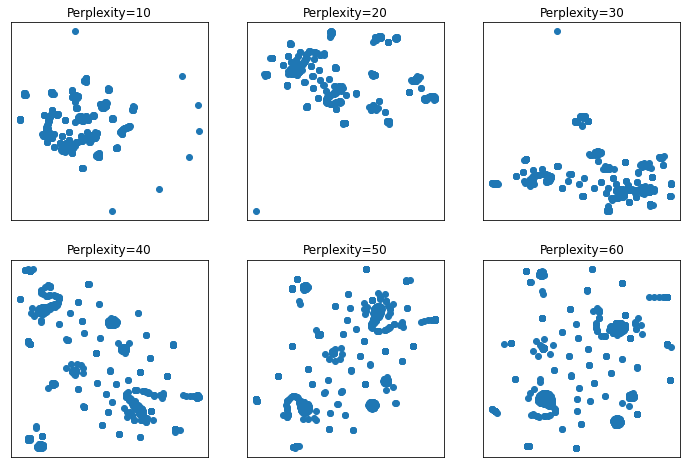

In [16]:
# Plot t-SNE output for different values of perplexity
perplexity = [10, 20, 30, 40, 50, 60]
fig, axs = plt.subplots(2,3, figsize=(12,8))
axs = axs.ravel()
for i, p in enumerate(perplexity):
    tsne = TSNE(n_components=2, perplexity=p)
    tsne_features = tsne.fit_transform(p_components)
    axs[i].scatter(tsne_features[:,0], tsne_features[:,1])
    axs[i].set_xticks([])
    axs[i].set_yticks([])
    axs[i].set_title(f"Perplexity={p}")
plt.show()

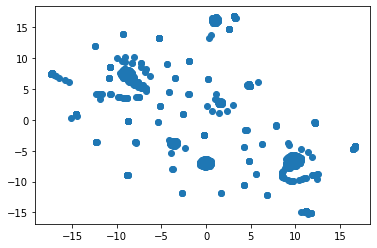

In [23]:
# Plot t-SNE output
X = tsne_features[:,0]
y = tsne_features[:,1]

plt.scatter(X, y)
plt.show()

In [24]:
# Identifying the  clusters using k-means
inertia = []
k_list = list(range(1, 11))

for k in k_list:
    km = KMeans(n_clusters=k, random_state=0)
    km.fit(p_components)
    inertia.append(km.inertia_)

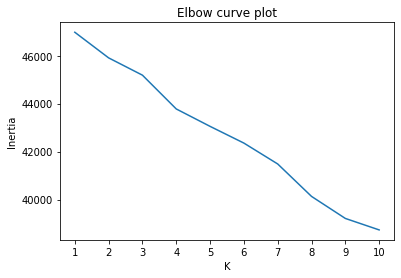

In [25]:
# Create the elbow plot
plt.plot(k_list, inertia)
plt.xticks(k_list)
plt.xlabel('K')
plt.ylabel('Inertia')
plt.title('Elbow curve plot')
plt.show()

In [ ]:
By using t-SNE and the elbow plot using k-means - it  suggests that there are no meaningful clusters in our data of crypto currencies.
